# Data Mining Project
### By:  Group 3: Elio Aybar, Cristal Garcia, Sunny Li, Matt Norgren

### Data Cleaning

In [65]:
#Packages to import
import os
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [66]:
### IMPORT SET

#Change working directory to match where the large files are stored
# it is not best practice to centrally store files this large - although
# git LFS should be explored

### CWD -  MAN
%cd "C:\Users\Matth\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project\"
## CWD - Cristal
#%cd "C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs"
#cd
## CWD - Elio 
#%cd "C:\Users\Tipo\Desktop\GitHub\Project"
## CWD - Sunny
#%cd "/Users/sunny/Data mining/final project


C:\Users\Matth\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project


In [67]:
### Establish Pandas Data Frames / Import

### Zillow Set
## Cities Crosswalk  Dataset 
#cc_df = pd.read_csv('cities_crosswalk.csv', index_col='Unique_City_ID')
## City Time Series 
#cts_df = pd.read_csv('City_time_series.csv', index_col='RegionName')
## County Time Series 
cots_df = pd.read_csv('County_time_series.csv', index_col='RegionName')
## County Cross Walk 
#ccw_df = pd.read_csv('CountyCrossWalk_Zillow.csv', index_col='CBSAName')
## Metro Time Series 
#mts_df = pd.read_csv('metro_time_series.csv', index_col='RegionName')
## Neighborhood Time Series - Import 
#nbh_df = pd.read_csv('Neighborhood_time_series.csv', index_col='RegionName')
##State Time Series 
#sts_df = pd.read_csv('State_time_series.csv', index_col='RegionName')
## Zip 
zip_df = pd.read_csv('Zip_time_series.csv')  ### Issues with NaN on import
## Public School Ratings 
PS_df = pd.read_csv('Public_Schools.csv')
## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')
## Food Desert 
foodlookup_df = pd.read_csv('food_access_variable_lookup.csv')
food_df = pd.read_csv('food_access_research_atlas.csv') 
## Hospital Quality Care 
hospital_df = pd.read_csv('Hospital General Information.csv', encoding="ISO-8859-1")
## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

In [ ]:
## Starbucks Upto 2017 for 70 Countries
SBUX_df = pd.read_csv('directory.csv')

## Target Up to 2017 for US 
TGT_df = pd.read_csv('target.csv', encoding="ISO-8859-1")

### Individual Set Cleaning (Preparing for Combination

In [ ]:
#######################################
## County Cross Walk -- Cleaning CG  ##
#######################################
#ccw_df.shape

#ccw_df.apply(lambda x: sum(x.isnull()))
#ccw_df.apply(lambda x: len(x.unique()))

In [4]:
################################
## Food Desert -- Cleaning CG  #
################################
food_df.shape

(72864, 147)

In [5]:
#Columns to drop
food_df.drop(['GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_Vehicle',  'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare'], axis = 1, inplace = True)
food_df.drop(['lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share'], axis = 1, inplace = True)
food_df.drop(['lasnap1', 'lasnap1share', 'lapop10', 'lapop10share', 'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lawhite10share', 'lablack10', 'lablack10share', 'laasian10', 'laasian10share', 'lanhopi10', 'lanhopi10share', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10', 'lahisp10share', 'lahunv10', 'lahunv10share', 'lasnap10', 'lasnap10share', 'lapop20', 'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share'], axis = 1, inplace = True)
food_df.drop(['lawhite20', 'lawhite20share', 'lablack20', 'lablack20share', 'laasian20', 'laasian20share', 'lanhopi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahisp20share', 'lahunv20', 'lahunv20share'], axis = 1, inplace = True)
food_df.drop(['LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'HUNVFlag', 'lasnap20', 'lasnap20share', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'], axis = 1, inplace = True)
food_df.drop(['LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20'], axis = 1, inplace = True)

In [6]:
food_df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10'], dtype='object')

In [7]:
####################################################################
## Public School Ratings (2014-2015 School years) -- Cleaning CG  ##
####################################################################

PS_df.shape

(102370, 33)

In [8]:
#Change 'LEVEL_' to change to integer (1: elementary, 2: middle school, 3: high school, 4:PK-13, N=0: Not specified)
PS_df['LEVEL_'] = PS_df['LEVEL_'].apply({'N':0, '1':1, '2':2, '3':3, '4':4 }.get)

In [9]:
#Drop ZIP4 because 43% of data missing and already have other location indicators; don't need Telephone, website, source, 
#'VAL_METHOD', 'NAICS_CODE'; 'NAICS_DESC' is generalized description of 'LEVEL'; SHELTER_ID doesn't have 76% of data available 

PS_df.drop(['X', 'Y', 'OBJECTID', 'NCESID', 'ZIP4', 'TELEPHONE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'VAL_METHOD', 'VAL_DATE',  'WEBSITE', 'ST_GRADE', 'END_GRADE', 'DISTRICTID',  'SHELTER_ID'], axis = 1, inplace = True)

#Drop Puerto Rico location
PS_df = PS_df[PS_df.COUNTRY != 'PRI']

#Drop Country column since all inland
PS_df.drop(['COUNTRY'], axis = 1, inplace = True)

#Convert SOURCEDATE to actual datatime type
PS_df['SOURCEDATE'] = pd.to_datetime(PS_df['SOURCEDATE'])

In [10]:
#Drop Duplication rows
PS_df.drop_duplicates(inplace= True)

In [11]:
#Drop schools with 0 and negative enrolment
PS_df = PS_df[PS_df.ENROLLMENT > 0]

In [12]:
#Drop schools with 0 and negative count of teachers
PS_df = PS_df[PS_df.FT_TEACHER > 0]

In [13]:
#Create Student: Teacher ratio based on enrollment and Teacher count. 30:1 is the ideal ratio 
PS_df['Class_Teacher_RATIO'] = PS_df['ENROLLMENT'] / PS_df['FT_TEACHER']

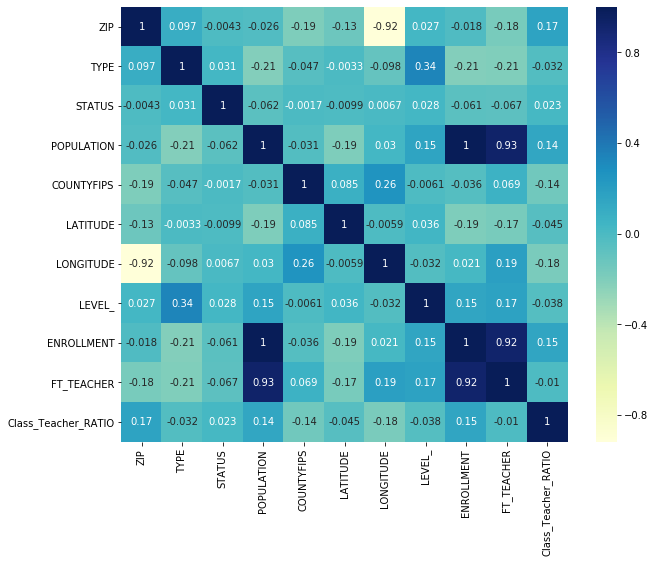

In [15]:
import seaborn as sns
#Visually represent collinearity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(PS_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
#############################################
## Cities Crosswalk  Dataset -- Cleaning EA #
#############################################
#cc_df.shape

In [ ]:
#cc_df.isnull().sum()

In [ ]:
##########################
## Target -- Cleaning EA #
##########################
TGT_df.shape

In [ ]:
TGT_df.info()

In [ ]:
#Select desired variables
TGT_df = TGT_df[['Address.FormattedAddress','Address.AddressLine1','Address.City','Address.CountryName','Address.Latitude','Address.Longitude','Address.County','Address.PostalCode','Address.Subdivision']]

In [ ]:
#Analize variable information
TGT_df.info()

In [ ]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

In [ ]:
#Change variable names
TGT_df = TGT_df.rename(columns={"Address.FormattedAddress": "FormattedAddress", 
                   "Address.AddressLine1": "AddressLine1",
                   "Address.City": "City",
                   "Address.CountryName": "CountryName",
                   "Address.Latitude": "Latitude",
                   "Address.Longitude": "Longitude",
                   "Address.County": "County",
                   "Address.PostalCode": "PostalCode",
                   "Address.Subdivision": "Subdivision",
                  })

In [ ]:
#Drop missing values in column County variable
TGT_df = TGT_df[TGT_df.County.notnull()]

In [ ]:
TGT_df.head()

In [ ]:
#!pip install missingno
#import missingno as msno
#%matplotlib inline
#msno.matrix(TGT_df)

In [ ]:
# Count the number of nan values in each column
print(TGT_df.isnull().sum())

In [ ]:
#####################################
## Metro Time Series -- Cleaning EA #
#####################################
#mts_df.shape

In [ ]:
#############################
## Starbucks -- Cleaning EA #
#############################
SBUX_df.shape

In [ ]:
#############################
SBUX_df.info()

In [ ]:
A_1 = SBUX_df['Brand']
print(A_1.groupby(A_1).count())

In [ ]:
A_2 = SBUX_df['Country']
print(A_2.groupby(A_2).count())

In [ ]:
SBUX_df = SBUX_df[SBUX_df["Brand"] == 'Starbucks']

In [ ]:
SBUX_df = SBUX_df[SBUX_df["Country"] == 'US']

In [ ]:
#Select desired variables
SBUX_df = SBUX_df[['Brand','Street Address','City','State/Province','Country','Postcode','Longitude','Latitude']]

In [ ]:
SBUX_df.head()

In [ ]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

In [ ]:
#Drop missing values in column County variable
SBUX_df = SBUX_df[SBUX_df.Postcode .notnull()]

In [ ]:
# Count the number of nan values in each column
print(SBUX_df.isnull().sum())

In [ ]:
SBUX_df.info()

In [4]:
#######################
## Zip -- Cleaning MN #
#######################
zip_df.shape
#Understand range of outputs
#zip_df.describe()

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
count,4.383885e+06,1.051104e+06,1.051104e+06,8194.000000,86554.000000,384738.000000,197581.000000,33722.000000,814908.000000,72778.000000,...,3.073015e+06,1.296485e+06,3.631566e+06,3.612063e+06,3.684376e+06,1.337362e+06,1.339353e+06,1.253969e+06,723542.000000,1.334321e+06
mean,4.683726e+04,1.230490e+02,1.230721e+02,322.914946,188.769142,144.331279,154.549637,223.571617,158.755338,273.766816,...,1.485749e+05,1.877266e+05,1.977040e+05,2.079495e+05,2.932095e+05,1.429688e+03,1.414117e+03,9.484601e-01,1325.079733,1.463457e+03
std,2.883334e+04,1.172875e+02,1.180173e+02,301.027216,186.646266,115.581365,114.846920,216.186771,134.386742,290.412769,...,1.240348e+05,1.426228e+05,1.771804e+05,2.040974e+05,2.970779e+05,7.197163e+02,6.913265e+02,4.240444e-01,568.827402,8.077924e+02
min,7.450000e+02,3.000000e+00,2.000000e+00,24.793388,21.045918,20.833333,21.384804,19.370574,15.716151,28.750000,...,1.350000e+04,2.700000e+04,1.670000e+04,1.670000e+04,2.690000e+04,4.110000e+02,4.110000e+02,2.760000e-01,414.000000,4.110000e+02
25%,2.183000e+04,4.600000e+01,4.600000e+01,155.056896,97.826937,91.187739,99.996853,109.830759,92.095406,122.861795,...,7.560000e+04,1.045000e+05,1.014000e+05,1.022000e+05,1.499000e+05,1.006000e+03,1.000000e+03,6.980000e-01,933.000000,1.007000e+03
50%,4.466900e+04,8.800000e+01,8.800000e+01,230.835830,139.332358,117.742281,125.722509,147.375569,122.694639,184.293515,...,1.129000e+05,1.457000e+05,1.470000e+05,1.495000e+05,2.152000e+05,1.246000e+03,1.238000e+03,8.340000e-01,1194.000000,1.251000e+03
75%,7.271800e+04,1.600000e+02,1.600000e+02,380.292972,215.616002,160.705393,168.603216,241.664617,175.354721,312.237594,...,1.735000e+05,2.211000e+05,2.301000e+05,2.390000e+05,3.318000e+05,1.613000e+03,1.598000e+03,1.052000e+00,1549.000000,1.642000e+03
max,9.990100e+04,2.560000e+03,2.639000e+03,2128.129602,2746.913580,3167.641326,3364.485981,2310.628893,2799.423447,2802.346570,...,3.872400e+06,3.083700e+06,7.212500e+06,7.313400e+06,1.296680e+07,1.837500e+04,1.780800e+04,6.496000e+00,15891.000000,2.096400e+04


In [5]:
## Understand the number of nulls
zip_df.isnull().sum()

Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    3332781
InventoryRaw_AllHomes                   3332781
MedianListingPricePerSqft_1Bedroom      4375691
                                         ...   
ZRI_AllHomes                            3046523
ZRI_AllHomesPlusMultifamily             3044532
ZriPerSqft_AllHomes                     3129916
Zri_MultiFamilyResidenceRental          3660343
Zri_SingleFamilyResidenceRental         3049564
Length: 76, dtype: int64

In [76]:
## Establish two new columns in order to test logic of replacement / consolidation
zip_df['NumberOfBedrooms'] = 0
zip_df['DwellingType'] = 0
zip_df['MedianListingPricePerSqft'] = 0
zip_df['MedianListingPrice'] = 0
zip_df['MedianRentalPrice'] = 0
zip_df['MedianRentalPricePerSqft'] = 0
zip_df['MedianListPPS_D'] = 0
zip_df['MedianList_D'] = 0
zip_df['MedianRentalPPS_D'] = 0
zip_df['MedianRental_D'] = 0

In [77]:
## Replace null with 0
zip_df['MedianListingPricePerSqft_1Bedroom'] = zip_df['MedianListingPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_2Bedroom'] = zip_df['MedianListingPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_3Bedroom'] = zip_df['MedianListingPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_4Bedroom'] = zip_df['MedianListingPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianListingPricePerSqft_5BedroomOrMore'] = zip_df['MedianListingPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianListingPrice_1Bedroom'] = zip_df['MedianListingPrice_1Bedroom'].fillna(0)
zip_df['MedianListingPrice_2Bedroom'] = zip_df['MedianListingPrice_2Bedroom'].fillna(0)
zip_df['MedianListingPrice_3Bedroom'] = zip_df['MedianListingPrice_3Bedroom'].fillna(0)
zip_df['MedianListingPrice_4Bedroom'] = zip_df['MedianListingPrice_4Bedroom'].fillna(0)
zip_df['MedianListingPrice_5BedroomOrMore'] = zip_df['MedianListingPrice_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPricePerSqft_1Bedroom'] = zip_df['MedianRentalPricePerSqft_1Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_2Bedroom'] = zip_df['MedianRentalPricePerSqft_2Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_3Bedroom'] = zip_df['MedianRentalPricePerSqft_3Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_4Bedroom'] = zip_df['MedianRentalPricePerSqft_4Bedroom'].fillna(0)
zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] = zip_df['MedianRentalPricePerSqft_5BedroomOrMore'].fillna(0)
##
zip_df['MedianRentalPrice_1Bedroom'] = zip_df['MedianRentalPrice_1Bedroom'].fillna(0)
zip_df['MedianRentalPrice_2Bedroom'] = zip_df['MedianRentalPrice_2Bedroom'].fillna(0)
zip_df['MedianRentalPrice_3Bedroom'] = zip_df['MedianRentalPrice_3Bedroom'].fillna(0)
zip_df['MedianRentalPrice_4Bedroom'] = zip_df['MedianRentalPrice_4Bedroom'].fillna(0)
zip_df['MedianRentalPrice_5BedroomOrMore'] = zip_df['MedianRentalPrice_5BedroomOrMore'].fillna(0)
##
zip_df['MedianListingPrice_AllHomes'] = zip_df['MedianListingPrice_AllHomes'].fillna(0)
zip_df['MedianListingPrice_CondoCoop'] = zip_df['MedianListingPrice_CondoCoop'].fillna(0)
zip_df['MedianListingPrice_DuplexTriplex'] = zip_df['MedianListingPrice_DuplexTriplex'].fillna(0)
zip_df['MedianListingPrice_SingleFamilyResidence'] = zip_df['MedianListingPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianListingPrice_AllHomes'] = zip_df['MedianListingPrice_AllHomes'].fillna(0)
zip_df['MedianListingPrice_CondoCoop'] = zip_df['MedianListingPrice_CondoCoop'].fillna(0)
zip_df['MedianListingPrice_DuplexTriplex'] = zip_df['MedianListingPrice_DuplexTriplex'].fillna(0)
zip_df['MedianListingPrice_SingleFamilyResidence'] = zip_df['MedianListingPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianListingPricePerSqft_AllHomes'] = zip_df['MedianListingPricePerSqft_AllHomes'].fillna(0)
zip_df['MedianListingPricePerSqft_CondoCoop'] = zip_df['MedianListingPricePerSqft_CondoCoop'].fillna(0)
zip_df['MedianListingPricePerSqft_DuplexTriplex'] = zip_df['MedianListingPricePerSqft_DuplexTriplex'].fillna(0)
zip_df['MedianListingPricePerSqft_SingleFamilyResidence'] = zip_df['MedianListingPricePerSqft_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianRentalPrice_AllHomes'] = zip_df['MedianRentalPrice_AllHomes'].fillna(0)
zip_df['MedianRentalPrice_CondoCoop'] = zip_df['MedianRentalPrice_CondoCoop'].fillna(0)
zip_df['MedianRentalPrice_DuplexTriplex'] = zip_df['MedianRentalPrice_DuplexTriplex'].fillna(0)
zip_df['MedianRentalPrice_SingleFamilyResidence'] = zip_df['MedianRentalPrice_SingleFamilyResidence'].fillna(0)
##
zip_df['MedianRentalPricePerSqft_AllHomes'] = zip_df['MedianRentalPricePerSqft_AllHomes'].fillna(0)
zip_df['MedianRentalPricePerSqft_CondoCoop'] = zip_df['MedianRentalPricePerSqft_CondoCoop'].fillna(0)
zip_df['MedianRentalPricePerSqft_DuplexTriplex'] = zip_df['MedianRentalPricePerSqft_DuplexTriplex'].fillna(0)
zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'] = zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'].fillna(0)
zip_df['MedianPctOfPriceReduction_AllHomes'] = zip_df['MedianPctOfPriceReduction_AllHomes'].fillna(0)
zip_df['MedianPctOfPriceReduction_CondoCoop'] = zip_df['MedianPctOfPriceReduction_CondoCoop'].fillna(0)
zip_df['MedianPctOfPriceReduction_SingleFamilyResidence'] = zip_df['MedianPctOfPriceReduction_SingleFamilyResidence'].fillna(0)
zip_df['MedianPriceCutDollar_AllHomes'] = zip_df['MedianPriceCutDollar_AllHomes'].fillna(0)
zip_df['MedianPriceCutDollar_CondoCoop'] = zip_df['MedianPriceCutDollar_CondoCoop'].fillna(0)
zip_df['MedianPriceCutDollar_SingleFamilyResidence'] = zip_df['MedianPriceCutDollar_SingleFamilyResidence'].fillna(0)

In [79]:
## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

condlist = [
    (zip_df['MedianListingPricePerSqft_1Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_2Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_3Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_4Bedroom'] != 0)
    ,(zip_df['MedianListingPricePerSqft_5BedroomOrMore'] != 0)
]

condlist2 = [(zip_df['MedianRentalPricePerSqft_AllHomes'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_CondoCoop'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_DuplexTriplex'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits'] != 0)
    ,(zip_df['MedianRentalPricePerSqft_Studio'] != 0)
]
      
#Establish if the criteria is met - what is the result
choicelist = [1,2,3,4,5]
choicelist2 = ['All','Condo','Duplex+','Single','Multi5+','Studio']
#Overwrite the number of bedroom columns with the given logic output 
zip_df['NumberOfBedrooms'] = np.select(condlist,choicelist)
zip_df['DwellingType'] = np.select(condlist2,choicelist2)

In [80]:
## Count per of decided bedrooms
zip_df['NumberOfBedrooms'].groupby(zip_df['NumberOfBedrooms']).count()

NumberOfBedrooms
0    3951999
1       8194
2      80569
3     310476
4      30627
5       2020
Name: NumberOfBedrooms, dtype: int64

In [81]:
## Count per of decided dwelling types
zip_df['DwellingType'].groupby(zip_df['DwellingType']).count()

DwellingType
All         120843
Condo          677
Duplex+       1231
Multi5+    4260210
Single         924
Name: DwellingType, dtype: int64

In [47]:
##Further Cleanup of like variables

## Optimized set in order to iterate through and assign a value to the new column created
## Many prior attempts utilized a more if then style structure but inevitably took a considerably long time
## and replaced when the value was 0  thus overwriting the prior data at every run
##WC: https://guillim.github.io/pandas/2018/10/22/Pandas-if-else-on-columns.html 

#condlist2 = [
#    (zip_df['MedianListingPrice_1Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_1Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_1Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_2Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_2Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_2Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_3Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_3Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_3Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_4Bedroom'] != 0)
#    ,(zip_df['MedianRentalPrice_4Bedroom'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_4Bedroom'] != 0)
#    ,(zip_df['MedianListingPrice_5BedroomOrMore'] != 0)
#    ,(zip_df['MedianRentalPrice_5BedroomOrMore'] != 0)
#    ,(zip_df['MedianRentalPricePerSqft_5BedroomOrMore'] != 0)
#]
#Establish if the criteria is met - what is the result
#choicelist2 = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
#Overwrite the number of bedroom columns with the given logic output 
#zip_df['NumberOfBedrooms'] = np.select(condlist2,choicelist2)

In [82]:
##Combine the bedroom columns into the median listing price per sqft column to reduce column space

zip_df['MedianListingPricePerSqft'] = (zip_df['MedianListingPricePerSqft_1Bedroom']
          + zip_df['MedianListingPricePerSqft_2Bedroom']
          + zip_df['MedianListingPricePerSqft_3Bedroom']
          + zip_df['MedianListingPricePerSqft_4Bedroom']
          + zip_df['MedianListingPricePerSqft_5BedroomOrMore'])
zip_df['MedianListingPrice'] = (zip_df['MedianListingPrice_1Bedroom']
          + zip_df['MedianListingPrice_2Bedroom']
          + zip_df['MedianListingPrice_3Bedroom']
          + zip_df['MedianListingPrice_4Bedroom']
          + zip_df['MedianListingPrice_5BedroomOrMore'])
zip_df['MedianRentalPricePerSqft'] = (zip_df['MedianRentalPricePerSqft_1Bedroom']
          + zip_df['MedianRentalPricePerSqft_2Bedroom']
          + zip_df['MedianRentalPricePerSqft_3Bedroom']
          + zip_df['MedianRentalPricePerSqft_4Bedroom']
          + zip_df['MedianRentalPricePerSqft_5BedroomOrMore'])
zip_df['MedianRentalPrice'] = (zip_df['MedianRentalPrice_1Bedroom']
          + zip_df['MedianRentalPrice_2Bedroom']
          + zip_df['MedianRentalPrice_3Bedroom']
          + zip_df['MedianRentalPrice_4Bedroom']
          + zip_df['MedianRentalPrice_5BedroomOrMore'])
zip_df['MedianListPPS_D'] = (zip_df['MedianListingPricePerSqft_AllHomes']
          + zip_df['MedianListingPricePerSqft_CondoCoop']
          + zip_df['MedianListingPricePerSqft_DuplexTriplex']
          + zip_df['MedianListingPricePerSqft_SingleFamilyResidence'])
zip_df['MedianList_D'] = (zip_df['MedianListingPrice_AllHomes']
          + zip_df['MedianListingPrice_CondoCoop']
          + zip_df['MedianListingPrice_DuplexTriplex']
          + zip_df['MedianListingPrice_SingleFamilyResidence'])
zip_df['MedianRentalPPS_D'] = (zip_df['MedianRentalPricePerSqft_AllHomes']
          + zip_df['MedianRentalPricePerSqft_CondoCoop']
          + zip_df['MedianRentalPricePerSqft_DuplexTriplex']
          + zip_df['MedianRentalPricePerSqft_SingleFamilyResidence'])
zip_df['MedianRental_D'] = (zip_df['MedianRentalPrice_AllHomes']
          + zip_df['MedianRentalPrice_CondoCoop']
          + zip_df['MedianRentalPrice_DuplexTriplex']
          + zip_df['MedianRentalPrice_SingleFamilyResidence'])

In [89]:
## Drop Zillow based columns - estimate based
## Drop prior consolidated columns
zip_df = zip_df.drop([
'ZHVI_1bedroom'
,'ZHVI_2bedroom'
,'ZHVI_3bedroom'
,'ZHVI_4bedroom'
,'ZHVI_5BedroomOrMore'
,'ZHVI_AllHomes'
,'ZHVI_BottomTier'
,'ZHVI_CondoCoop'
,'ZHVI_MiddleTier'
,'ZHVI_SingleFamilyResidence'
,'ZHVI_TopTier'
,'ZRI_AllHomes'
,'ZRI_AllHomesPlusMultifamily'
,'ZriPerSqft_AllHomes'
,'Zri_MultiFamilyResidenceRental'
,'Zri_SingleFamilyResidenceRental'
,'MedianListingPrice_1Bedroom'
,'MedianListingPrice_2Bedroom'
,'MedianListingPrice_3Bedroom'
,'MedianListingPrice_4Bedroom'            
,'MedianListingPrice_5BedroomOrMore'
,'MedianListingPricePerSqft_1Bedroom'
,'MedianListingPricePerSqft_2Bedroom'
,'MedianListingPricePerSqft_3Bedroom'
,'MedianListingPricePerSqft_4Bedroom'            
,'MedianListingPricePerSqft_5BedroomOrMore'
,'MedianRentalPrice_1Bedroom'
,'MedianRentalPrice_2Bedroom'
,'MedianRentalPrice_3Bedroom'
,'MedianRentalPrice_4Bedroom'            
,'MedianRentalPrice_5BedroomOrMore'
,'MedianRentalPricePerSqft_1Bedroom'
,'MedianRentalPricePerSqft_2Bedroom'
,'MedianRentalPricePerSqft_3Bedroom'
,'MedianRentalPricePerSqft_4Bedroom'            
,'MedianRentalPricePerSqft_5BedroomOrMore'
,'MedianListingPricePerSqft_AllHomes'
,'MedianListingPricePerSqft_CondoCoop'
,'MedianListingPricePerSqft_DuplexTriplex'
,'MedianListingPricePerSqft_SingleFamilyResidence'
,'MedianListingPrice_AllHomes'
,'MedianListingPrice_CondoCoop'
,'MedianListingPrice_DuplexTriplex'
,'MedianListingPrice_SingleFamilyResidence'
,'MedianPctOfPriceReduction_AllHomes'
,'MedianPctOfPriceReduction_CondoCoop'
,'MedianPctOfPriceReduction_SingleFamilyResidence'
,'MedianPriceCutDollar_AllHomes'
,'MedianPriceCutDollar_CondoCoop'
,'MedianPriceCutDollar_SingleFamilyResidence'
,'MedianRentalPricePerSqft_AllHomes'
,'MedianRentalPricePerSqft_CondoCoop'
,'MedianRentalPricePerSqft_DuplexTriplex'
,'MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits'
,'MedianRentalPricePerSqft_SingleFamilyResidence'
,'MedianRentalPricePerSqft_Studio'
,'MedianRentalPrice_AllHomes'
,'MedianRentalPrice_CondoCoop'
,'MedianRentalPrice_DuplexTriplex'
,'MedianRentalPrice_MultiFamilyResidence5PlusUnits'
,'MedianRentalPrice_SingleFamilyResidence'
,'MedianRentalPrice_Studio'
,'PctOfHomesDecreasingInValues_AllHomes'
,'PctOfHomesIncreasingInValues_AllHomes'
,'PctOfListingsWithPriceReductionsSeasAdj_AllHomes'
,'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'
,'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'
,'PctOfListingsWithPriceReductions_AllHomes'
,'PctOfListingsWithPriceReductions_CondoCoop'
,'PctOfListingsWithPriceReductions_SingleFamilyResidence'
,'PriceToRentRatio_AllHomes'
],axis=1)

In [90]:
zip_df.shape

(4383885, 15)

In [ ]:
## Validation check to understand frequency



In [ ]:
#######################################
## County Time Series -- Cleaning CG ##
#######################################
cots_df.shape

#cots_df.apply(lambda x: len(x.unique()))
#cots_df.apply(lambda x: sum(x.isnull()))

In [ ]:
#####################################
## City Time Series  -- Cleaning MN #
#####################################
#cts_df.shape
#Understand range of outputs
#cts_df.describe()

In [ ]:
#cts_df.isnull().sum()

In [ ]:
############################################
## Neighborhood Time Series -- Cleaning SL #
############################################
nbh_df.shape

In [ ]:
####################################
##State Time Series -- Cleaning SL #
####################################
sts_df.shape

In [ ]:
#########################################
## Hospital Quality Care -- Cleaning SL #
#########################################
hospital_df.shape

In [ ]:
missing_df = hospital_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index()

#2406 is half the amount of rows
missing_2406 = list(missing_df[missing_df.missing_value >= 2406]['index'])
#print(len(missing_2406))

#Drop any data missing more than 50% of data
hospital_df.drop(missing_2406, axis = 1, inplace = True)

hospital_df.shape

In [ ]:
hospital_df

### Consolidation
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

In [ ]:
#### Consolidate dataframes for ease of use
pd.concat()


### Dimensional Reduction & Quick Analysis

### Feature Engineering
https://pypi.org/project/autoimpute/

### Model Training

In [ ]:
#(test as much algorithm as possible, possible models include Random Forest, Gradient Boosting, Ada-Boosting, Voting Classifier...)

### Hyperparameter Tuning

Use Randome search training for parameters found in following article: 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

#### Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

#### Create the random grid
random_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

#### Use the random grid to search for best hyperparameters
#### First create the base model to tune
dt = DecisionTreeRegressor()

#### Random search of parameters, using 10 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

#### Fit the random search model
dt_random.fit(X_train, y_train)

#### See what best parameters from fitting the random search: 
dt_random.best_params_

### Model Accuracy Testing